# Task 2: Implementing a neural network utilizing Euler's method

In [1]:
from sw.IntegratorNN import *
from sw.dataformating import get_train_and_val_data
from sw.simulation import simulateRandomEuler, gravityCenterEuler
from sw.plotting import *

from torch.utils.data import DataLoader
DATA_FILEPATH = "datasets/postvis.csv"

## Hyperparameters:

In [2]:
LR = 1e-5 #learning rate
BATCHES = 256
EPOCHS = 5

INPUT_SIZE = 2
OUTPUT_SIZE = 2
DEPTH = 100

## Formating data for input:

In [3]:
train_percent = 80
train_data, val_data = get_train_and_val_data(DATA_FILEPATH,train_percent)

train_set = DataLoader(train_data,batch_size=BATCHES,shuffle=True)
val_set = DataLoader(val_data,shuffle=True)

## Training NN with Euler template:

In [4]:
integratorNN = IntegratorNN(INPUT_SIZE,DEPTH,OUTPUT_SIZE)
loss_data = integrator_training(integratorNN,LR,EPOCHS,train_set)
val_loss, train_step = integrator_validating(integratorNN,LR,train_set,val_set)

## Testing model:
Here we use the validation set as input and solve for the position using scipy.solve_ivp()

In [5]:
t = 50
num = 25

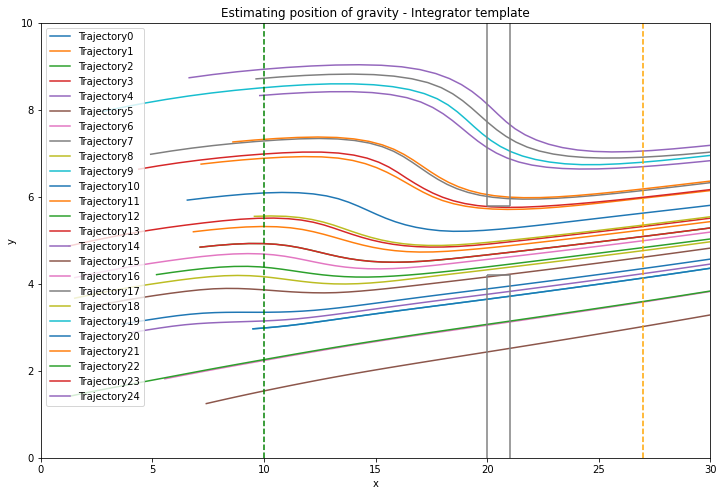

In [9]:
traj = simulateRandomEuler(num,t,integratorNN,DATA_FILEPATH)
plot_traj(num,traj)

## Estimating center of gravity for all pedestrians:

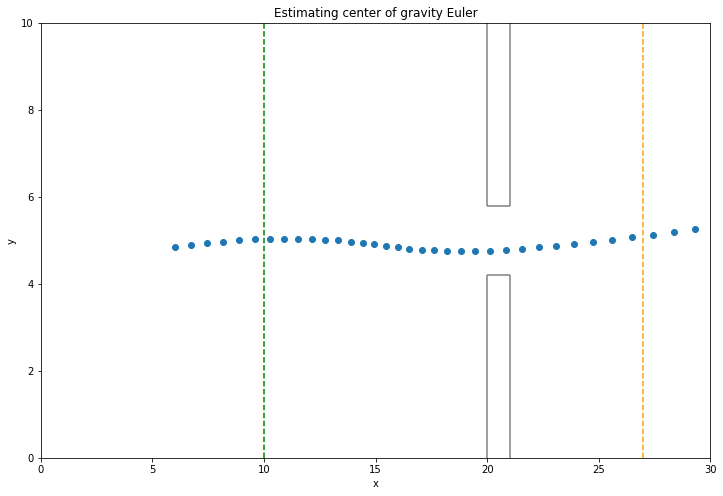

In [12]:
traj = gravityCenterEuler(integratorNN,t,DATA_FILEPATH)
plot_scatter(traj,lab="Center of gravity for all pedestrains",title="Estimating center of gravity Euler")

## Phase plot:

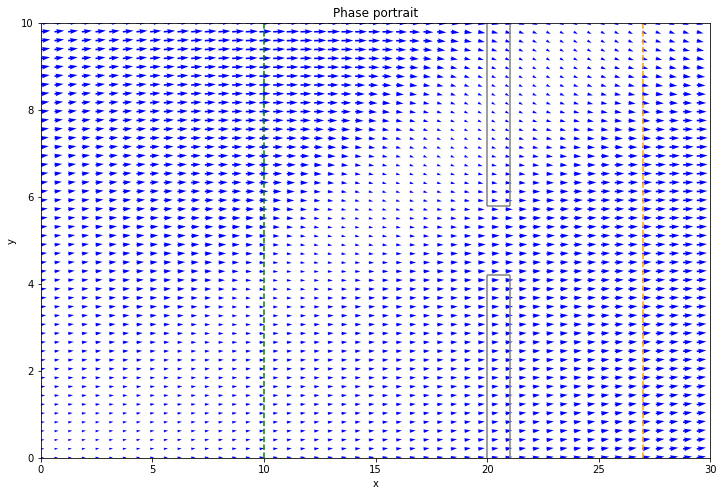

In [13]:
X, Y, U, V = vectorize_scenario(integratorNN)
phase_portrait(X, Y, U, V)